In [3]:
from sympy import *
init_printing()
import numpy as np

In [4]:
x,y,z = symbols('x,y,z')
lamda,gamma,T = symbols('lambda,gamma,T')
theta, chi, iteration_no = symbols('theta, chi, n')

In [5]:
B = Matrix([[x,z*exp(-gamma*T)],[z*exp(-gamma*T),(y-1)*exp(-2*gamma*T)+1]])
B

⎡                  -T⋅γ      ⎤
⎢   x           z⋅ℯ          ⎥
⎢                            ⎥
⎢   -T⋅γ           -2⋅T⋅γ    ⎥
⎣z⋅ℯ      (y - 1)⋅ℯ       + 1⎦

In [6]:
h,a = symbols('h,a')
phi = Matrix([[1 - h**2/(2*a), h],[-h/a * (1 - h**2/(4*a)), 1 - h**2/(2*a)]])
phi

⎡         2            ⎤
⎢        h             ⎥
⎢   1 - ───        h   ⎥
⎢       2⋅a            ⎥
⎢                      ⎥
⎢   ⎛      2⎞          ⎥
⎢   ⎜     h ⎟          ⎥
⎢-h⋅⎜1 - ───⎟         2⎥
⎢   ⎝    4⋅a⎠        h ⎥
⎢─────────────  1 - ───⎥
⎣      a            2⋅a⎦

In [7]:
(Matrix([[1,0],[0,1]]) - phi)/h

⎡   h        ⎤
⎢  ───    -1 ⎥
⎢  2⋅a       ⎥
⎢            ⎥
⎢      2     ⎥
⎢     h      ⎥
⎢1 - ───     ⎥
⎢    4⋅a   h ⎥
⎢───────  ───⎥
⎣   a     2⋅a⎦

In [8]:
Mk = phi.transpose()*phi
Mk

⎡                             2                                          ⎤
⎢                    ⎛      2⎞                        ⎛      2⎞ ⎛      2⎞⎥
⎢             2    2 ⎜     h ⎟                        ⎜     h ⎟ ⎜     h ⎟⎥
⎢    ⎛      2⎞    h ⋅⎜1 - ───⎟          ⎛      2⎞   h⋅⎜1 - ───⎟⋅⎜1 - ───⎟⎥
⎢    ⎜     h ⎟       ⎝    4⋅a⎠          ⎜     h ⎟     ⎝    2⋅a⎠ ⎝    4⋅a⎠⎥
⎢    ⎜1 - ───⎟  + ─────────────       h⋅⎜1 - ───⎟ - ─────────────────────⎥
⎢    ⎝    2⋅a⎠           2              ⎝    2⋅a⎠             a          ⎥
⎢                       a                                                ⎥
⎢                                                                        ⎥
⎢                ⎛      2⎞ ⎛      2⎞                                     ⎥
⎢                ⎜     h ⎟ ⎜     h ⎟                          2          ⎥
⎢  ⎛      2⎞   h⋅⎜1 - ───⎟⋅⎜1 - ───⎟                 ⎛      2⎞           ⎥
⎢  ⎜     h ⎟     ⎝    2⋅a⎠ ⎝    4⋅a⎠             2   ⎜     h ⎟           ⎥
⎢h⋅⎜1 - ───⎟ - ──────────

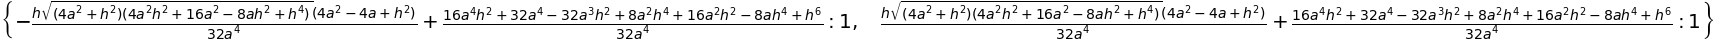

In [9]:
Mk.eigenvals()

In [10]:
Jk = Matrix([[h/(2*a),-1],[1/a * (1 - h**2/(4*a)), h/(2*a)]])
Jk

⎡   h        ⎤
⎢  ───    -1 ⎥
⎢  2⋅a       ⎥
⎢            ⎥
⎢      2     ⎥
⎢     h      ⎥
⎢1 - ───     ⎥
⎢    4⋅a   h ⎥
⎢───────  ───⎥
⎣   a     2⋅a⎦

In [11]:
Ak = Jk.transpose() * Jk
Ak

⎡                 2                      ⎤
⎢        ⎛      2⎞              ⎛      2⎞⎥
⎢        ⎜     h ⎟              ⎜     h ⎟⎥
⎢   2    ⎜1 - ───⎟            h⋅⎜1 - ───⎟⎥
⎢  h     ⎝    4⋅a⎠       h      ⎝    4⋅a⎠⎥
⎢ ──── + ──────────   - ─── + ───────────⎥
⎢    2        2         2⋅a          2   ⎥
⎢ 4⋅a        a                    2⋅a    ⎥
⎢                                        ⎥
⎢          ⎛      2⎞                     ⎥
⎢          ⎜     h ⎟                     ⎥
⎢        h⋅⎜1 - ───⎟             2       ⎥
⎢   h      ⎝    4⋅a⎠            h        ⎥
⎢- ─── + ───────────       1 + ────      ⎥
⎢  2⋅a          2                 2      ⎥
⎣            2⋅a               4⋅a       ⎦

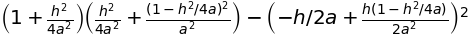

In [12]:
Ak.det()

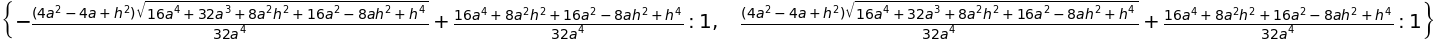

In [13]:
Ak.eigenvals()

In [14]:
k = symbols('k')

In [15]:
L = Matrix([[cos(k*theta), chi * sin(k*theta)], 
            [-(1/chi) * sin(k*theta), cos(k*theta)]])
L

⎡ cos(k⋅θ)   χ⋅sin(k⋅θ)⎤
⎢                      ⎥
⎢-sin(k⋅θ)             ⎥
⎢──────────   cos(k⋅θ) ⎥
⎣    χ                 ⎦

In [18]:
D = Matrix([[1, 0],[0, exp(-gamma * T)]])
D

⎡1    0  ⎤
⎢        ⎥
⎢    -T⋅γ⎥
⎣0  ℯ    ⎦

In [22]:
matx = D.transpose() * L.transpose() * L * D
matx

⎡                              2                                              
⎢                  2        sin (k⋅θ)                 ⎛                      s
⎢               cos (k⋅θ) + ─────────                 ⎜χ⋅sin(k⋅θ)⋅cos(k⋅θ) - ─
⎢                                2                    ⎝                       
⎢                               χ                                             
⎢                                                                             
⎢                             -T⋅γ                                            
⎢   -T⋅γ                     ℯ    ⋅sin(k⋅θ)⋅cos(k⋅θ)   ⎛ 2  -T⋅γ    2         
⎢χ⋅ℯ    ⋅sin(k⋅θ)⋅cos(k⋅θ) - ───────────────────────   ⎝χ ⋅ℯ    ⋅sin (k⋅θ) + ℯ
⎣                                       χ                                     

                       ⎤
in(k⋅θ)⋅cos(k⋅θ)⎞  -T⋅γ⎥
────────────────⎟⋅ℯ    ⎥
       χ        ⎠      ⎥
                       ⎥
                       ⎥
                       ⎥
-T⋅γ    2     ⎞  -T⋅γ  ⎥
    ⋅cos 

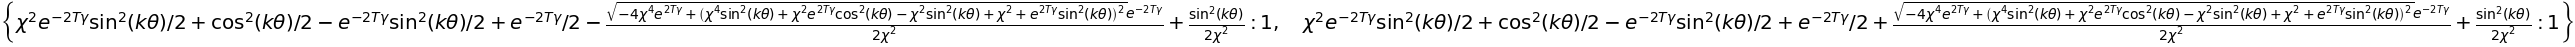

In [27]:
matx.eigenvals()

In [15]:
Covar = L * B * L.transpose()
Covar

⎡                                                                             
⎢  ⎛  ⎛         -2⋅T⋅γ    ⎞               -T⋅γ         ⎞            ⎛     -T⋅γ
⎢χ⋅⎝χ⋅⎝(y - 1)⋅ℯ       + 1⎠⋅sin(k⋅θ) + z⋅ℯ    ⋅cos(k⋅θ)⎠⋅sin(k⋅θ) + ⎝χ⋅z⋅ℯ    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢    ⎛                                    -T⋅γ         ⎞                      
⎢    ⎜⎛         -2⋅T⋅γ    ⎞            z⋅ℯ    ⋅sin(k⋅θ)⎟            ⎛   -T⋅γ  
⎢  χ⋅⎜⎝(y - 1)⋅ℯ       + 1⎠⋅cos(k⋅θ) - ────────────────⎟⋅sin(k⋅θ) + ⎜z⋅ℯ    ⋅c
⎣    ⎝                                        χ        ⎠            ⎝         

                                                                              
                      ⎞           ⎛  ⎛         -2⋅T⋅γ    ⎞               -T⋅γ 
⋅sin(k⋅θ) + x⋅cos(k⋅θ)⎠⋅cos(k⋅θ)  ⎝χ⋅⎝(y - 1)⋅ℯ    

In [44]:
simplify(expand(Covar.subs([(z,0),(y,1),(x,1)])))

⎡      2    2           2       ⎛ 2    ⎞            ⎤
⎢-a + χ ⋅sin (k⋅θ) + cos (k⋅θ)  ⎝χ  - 1⎠⋅sin(2⋅k⋅θ) ⎥
⎢─────────────────────────────  ─────────────────── ⎥
⎢              a                       2⋅a⋅χ        ⎥
⎢                                                   ⎥
⎢     ⎛ 2    ⎞                  ⎛   2    ⎞    2     ⎥
⎢     ⎝χ  - 1⎠⋅sin(2⋅k⋅θ)       ⎝- χ  + 1⎠⋅sin (k⋅θ)⎥
⎢     ───────────────────       ────────────────────⎥
⎢             2⋅χ                         2         ⎥
⎣                                        χ          ⎦

In [45]:
x0 = 1
y0 = 1
z0 = 0
for i in range(2):
    final_expr = simplify(expand(Covar.subs([(x,x0),(y,y0),(z,z0)])))
    x0 = Covar[0,0]
    y0 = Covar[1,1]
    z0 = Covar[0,1]

In [46]:
final_expr

⎡                                                               ⎛             
⎢                                                               ⎜   3  5⋅T⋅γ  
⎢                                                               ⎜- a ⋅ℯ      +
⎢                                                               ⎝             
⎢                                                               ──────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢⎛                                         2  2                               
⎢⎜ 2  2          T⋅γ             3        a ⋅χ ⋅(-6⋅sin(2⋅k⋅θ) + sin(4⋅k⋅θ))⋅ℯ
⎢⎜a ⋅χ ⋅(y - 1)⋅ℯ   ⋅sin(k⋅θ)⋅cos (k⋅θ) + ────────────────────────────────────
⎢⎝                                                            8               
⎢───────────────────────────────────────────────────

In [16]:
norm_guy = Covar
norm_guy[0,0] = Covar[0,0]/a - 1
norm_guy[0,1] = Covar[0,1]/a
norm_guy[1,1] = Covar[1,1] - 1
norm_guy

⎡                                                                             
⎢                                                                             
⎢       ⎛  ⎛         -2⋅T⋅γ    ⎞               -T⋅γ         ⎞            ⎛    
⎢     χ⋅⎝χ⋅⎝(y - 1)⋅ℯ       + 1⎠⋅sin(k⋅θ) + z⋅ℯ    ⋅cos(k⋅θ)⎠⋅sin(k⋅θ) + ⎝χ⋅z⋅
⎢-1 + ────────────────────────────────────────────────────────────────────────
⎢                                                           a                 
⎢                                                                             
⎢                                                                             
⎢      ⎛                                    -T⋅γ         ⎞                    
⎢      ⎜⎛         -2⋅T⋅γ    ⎞            z⋅ℯ    ⋅sin(k⋅θ)⎟            ⎛   -T⋅γ
⎢    χ⋅⎜⎝(y - 1)⋅ℯ       + 1⎠⋅cos(k⋅θ) - ────────────────⎟⋅sin(k⋅θ) + ⎜z⋅ℯ    
⎣      ⎝                                        χ        ⎠            ⎝       

                                                   

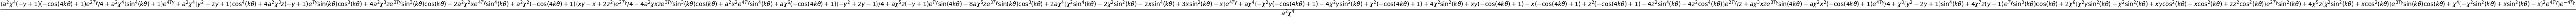

In [32]:
simplify(expand(norm_guy[0,0]**2 + norm_guy[1,1]**2 - (2 * norm_guy[0,1] * norm_guy[1,0])))

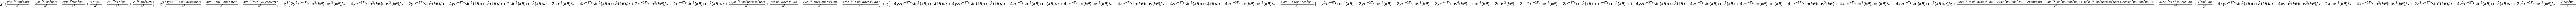

In [39]:
collect(expand(norm_guy[0,0]**2 + norm_guy[1,1]**2 + (2 * norm_guy[0,1] * norm_guy[1,0])), chi)

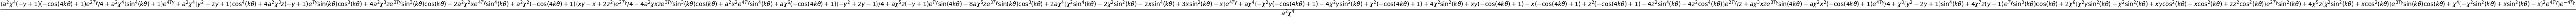

In [35]:
simplify(expand(norm_guy[0,0]**2 + norm_guy[1,1]**2 - (2 * norm_guy[0,1] * norm_guy[1,0])))

In [24]:
(x+y) * (x+y)

In [19]:
norm_guy[0,1]

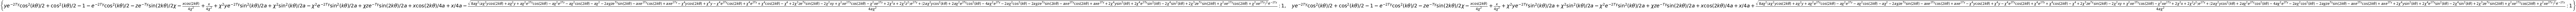

In [75]:
norm_guy.eigenvals()

In [67]:
JL = phi * B * phi.transpose()
JL

⎡                                                                             
⎢                                                                             
⎢            ⎛                            ⎛      2⎞      ⎞   ⎛      2⎞ ⎛      
⎢            ⎜  ⎛         -2⋅T⋅γ    ⎞     ⎜     h ⎟  -T⋅γ⎟   ⎜     h ⎟ ⎜     -
⎢          h⋅⎜h⋅⎝(y - 1)⋅ℯ       + 1⎠ + z⋅⎜1 - ───⎟⋅ℯ    ⎟ + ⎜1 - ───⎟⋅⎜h⋅z⋅ℯ 
⎢            ⎝                            ⎝    2⋅a⎠      ⎠   ⎝    2⋅a⎠ ⎝      
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢  ⎛                                      ⎛      2⎞      ⎞             ⎛      
⎢  ⎜                                      ⎜     h ⎟  -T⋅γ⎟             ⎜      
⎢  ⎜⎛      2⎞                         h⋅z⋅⎜1 - ───⎟⋅ℯ    ⎟   ⎛      2⎞ ⎜  ⎛   
⎢  ⎜⎜     h ⎟ ⎛         -2⋅T⋅γ    ⎞       ⎝    4⋅a⎠ 

In [43]:
F = Matrix([[1,0],[0,exp(-gamma*T)]])
F

⎡1    0  ⎤
⎢        ⎥
⎢    -T⋅γ⎥
⎣0  ℯ    ⎦

In [44]:
T = F * L.transpose() * L * F

⎡                              2                                              
⎢                  2        sin (n⋅θ)                 ⎛                      s
⎢               cos (n⋅θ) + ─────────                 ⎜χ⋅sin(n⋅θ)⋅cos(n⋅θ) - ─
⎢                                2                    ⎝                       
⎢                               χ                                             
⎢                                                                             
⎢                             -T⋅γ                                            
⎢   -T⋅γ                     ℯ    ⋅sin(n⋅θ)⋅cos(n⋅θ)   ⎛ 2  -T⋅γ    2         
⎢χ⋅ℯ    ⋅sin(n⋅θ)⋅cos(n⋅θ) - ───────────────────────   ⎝χ ⋅ℯ    ⋅sin (n⋅θ) + ℯ
⎣                                       χ                                     

                       ⎤
in(n⋅θ)⋅cos(n⋅θ)⎞  -T⋅γ⎥
────────────────⎟⋅ℯ    ⎥
       χ        ⎠      ⎥
                       ⎥
                       ⎥
                       ⎥
-T⋅γ    2     ⎞  -T⋅γ  ⎥
    ⋅cos 

In [41]:
P = Matrix([[0,0],[0,1]])
P

⎡0  0⎤
⎢    ⎥
⎣0  1⎦

In [42]:
L * P * L.transpose()

⎡    2    2                              ⎤
⎢   χ ⋅sin (n⋅θ)      χ⋅sin(n⋅θ)⋅cos(n⋅θ)⎥
⎢                                        ⎥
⎢                             2          ⎥
⎣χ⋅sin(n⋅θ)⋅cos(n⋅θ)       cos (n⋅θ)     ⎦

In [36]:
Main = L.transpose() * L
Main

⎡                        2                                                    
⎢            2        sin (n⋅θ)                                 sin(n⋅θ)⋅cos(n
⎢         cos (n⋅θ) + ─────────           χ⋅sin(n⋅θ)⋅cos(n⋅θ) - ──────────────
⎢                          2                                            χ     
⎢                         χ                                                   
⎢                                                                             
⎢                      sin(n⋅θ)⋅cos(n⋅θ)          2    2           2          
⎢χ⋅sin(n⋅θ)⋅cos(n⋅θ) - ─────────────────         χ ⋅sin (n⋅θ) + cos (n⋅θ)     
⎣                              χ                                              

   ⎤
⋅θ)⎥
───⎥
   ⎥
   ⎥
   ⎥
   ⎥
   ⎥
   ⎦

In [37]:
Main[0,1] = exp(-gamma*T) * Main[0,1]
Main[1,0] = Main[0,1]
Main[1,1] = exp(-2*gamma*T) * Main[1,1]
Main

⎡                            2                                                
⎢                2        sin (n⋅θ)               ⎛                      sin(n
⎢             cos (n⋅θ) + ─────────               ⎜χ⋅sin(n⋅θ)⋅cos(n⋅θ) - ─────
⎢                              2                  ⎝                           
⎢                             χ                                               
⎢                                                                             
⎢⎛                      sin(n⋅θ)⋅cos(n⋅θ)⎞  -T⋅γ        ⎛ 2    2           2  
⎢⎜χ⋅sin(n⋅θ)⋅cos(n⋅θ) - ─────────────────⎟⋅ℯ            ⎝χ ⋅sin (n⋅θ) + cos (n
⎣⎝                              χ        ⎠                                    

                   ⎤
⋅θ)⋅cos(n⋅θ)⎞  -T⋅γ⎥
────────────⎟⋅ℯ    ⎥
   χ        ⎠      ⎥
                   ⎥
                   ⎥
   ⎞  -2⋅T⋅γ       ⎥
⋅θ)⎠⋅ℯ             ⎥
                   ⎦

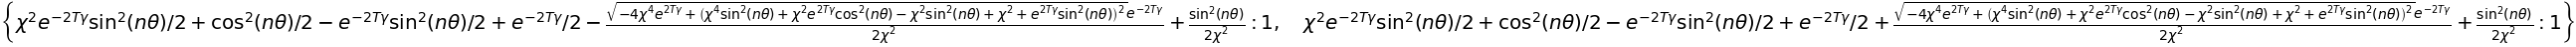

In [40]:
Main.eigenvals()

In [29]:
C = L * B * L.transpose()
C

⎡                                                                             
⎢  ⎛  ⎛         -2⋅T⋅γ    ⎞               -T⋅γ         ⎞            ⎛     -T⋅γ
⎢χ⋅⎝χ⋅⎝(y - 1)⋅ℯ       + 1⎠⋅sin(n⋅θ) + z⋅ℯ    ⋅cos(n⋅θ)⎠⋅sin(n⋅θ) + ⎝χ⋅z⋅ℯ    
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢    ⎛                                    -T⋅γ         ⎞                      
⎢    ⎜⎛         -2⋅T⋅γ    ⎞            z⋅ℯ    ⋅sin(n⋅θ)⎟            ⎛   -T⋅γ  
⎢  χ⋅⎜⎝(y - 1)⋅ℯ       + 1⎠⋅cos(n⋅θ) - ────────────────⎟⋅sin(n⋅θ) + ⎜z⋅ℯ    ⋅c
⎣    ⎝                                        χ        ⎠            ⎝         

                                                                              
                      ⎞           ⎛  ⎛         -2⋅T⋅γ    ⎞               -T⋅γ 
⋅sin(n⋅θ) + x⋅cos(n⋅θ)⎠⋅cos(n⋅θ)  ⎝χ⋅⎝(y - 1)⋅ℯ    

In [6]:
cos(iteration_no * theta)

In [7]:
h,a = symbols('h,a')
A = Matrix([[1 - (h**2/(2*a)), h],
             [-(h/a)*(1-h**2/(4*a)), 1-(h**2/(2*a))]])

x,y,z = symbols('x,y,z')

M = Matrix([[],
            []])
A

⎡         2            ⎤
⎢        h             ⎥
⎢   1 - ───        h   ⎥
⎢       2⋅a            ⎥
⎢                      ⎥
⎢   ⎛      2⎞          ⎥
⎢   ⎜     h ⎟          ⎥
⎢-h⋅⎜1 - ───⎟         2⎥
⎢   ⎝    4⋅a⎠        h ⎥
⎢─────────────  1 - ───⎥
⎣      a            2⋅a⎦

In [8]:
A**2

⎡                ⎛      2⎞                           ⎤
⎢         2    2 ⎜     h ⎟                           ⎥
⎢⎛      2⎞    h ⋅⎜1 - ───⎟            ⎛      2⎞      ⎥
⎢⎜     h ⎟       ⎝    4⋅a⎠            ⎜     h ⎟      ⎥
⎢⎜1 - ───⎟  - ────────────        2⋅h⋅⎜1 - ───⎟      ⎥
⎢⎝    2⋅a⎠         a                  ⎝    2⋅a⎠      ⎥
⎢                                                    ⎥
⎢     ⎛      2⎞ ⎛      2⎞                   ⎛      2⎞⎥
⎢     ⎜     h ⎟ ⎜     h ⎟            2    2 ⎜     h ⎟⎥
⎢-2⋅h⋅⎜1 - ───⎟⋅⎜1 - ───⎟   ⎛      2⎞    h ⋅⎜1 - ───⎟⎥
⎢     ⎝    2⋅a⎠ ⎝    4⋅a⎠   ⎜     h ⎟       ⎝    4⋅a⎠⎥
⎢─────────────────────────  ⎜1 - ───⎟  - ────────────⎥
⎣            a              ⎝    2⋅a⎠         a      ⎦

In [9]:
A.eigenvects()

⎡⎛                                  ⎡⎡                 -h                  ⎤⎤⎞
⎢⎜       ___________                ⎢⎢─────────────────────────────────────⎥⎥⎟
⎢⎜      ╱         2           2     ⎢⎢               ___________           ⎥⎥⎟
⎢⎜  h⋅╲╱  -4⋅a + h     2⋅a - h      ⎢⎢      2       ╱         2           2⎥⎥⎟
⎢⎜- ──────────────── + ────────, 1, ⎢⎢     h    h⋅╲╱  -4⋅a + h     2⋅a - h ⎥⎥⎟
⎢⎜        2⋅a            2⋅a        ⎢⎢1 - ─── + ──────────────── - ────────⎥⎥⎟
⎢⎜                                  ⎢⎢    2⋅a         2⋅a            2⋅a   ⎥⎥⎟
⎢⎜                                  ⎢⎢                                     ⎥⎥⎟
⎣⎝                                  ⎣⎣                  1                  ⎦⎦⎠

  ⎛                                ⎡⎡                 -h                  ⎤⎤⎞⎤
  ⎜     ___________                ⎢⎢─────────────────────────────────────⎥⎥⎟⎥
  ⎜    ╱         2           2     ⎢⎢               ___________           ⎥⎥⎟⎥
  ⎜h⋅╲╱  -4⋅a + h     2⋅a - h      ⎢⎢      2       

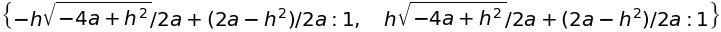

In [10]:
A.eigenvals()

In [11]:
P,D = A.diagonalize()

In [12]:
P

⎡    -2⋅a             2⋅a      ⎤
⎢──────────────  ──────────────⎥
⎢   ___________     ___________⎥
⎢  ╱         2     ╱         2 ⎥
⎢╲╱  -4⋅a + h    ╲╱  -4⋅a + h  ⎥
⎢                              ⎥
⎣      1               1       ⎦

In [13]:
D

⎡                ___________                             ⎤
⎢       2       ╱         2                              ⎥
⎢2⋅a - h  - h⋅╲╱  -4⋅a + h                               ⎥
⎢───────────────────────────               0             ⎥
⎢            2⋅a                                         ⎥
⎢                                                        ⎥
⎢                                             ___________⎥
⎢                                    2       ╱         2 ⎥
⎢                             2⋅a - h  + h⋅╲╱  -4⋅a + h  ⎥
⎢             0               ───────────────────────────⎥
⎣                                         2⋅a            ⎦

In [14]:
P*D*P**-1

⎡                                  ___________                   ___________  
⎢                         2       ╱         2           2       ╱         2   
⎢                  2⋅a - h  - h⋅╲╱  -4⋅a + h     2⋅a - h  + h⋅╲╱  -4⋅a + h    
⎢                  ─────────────────────────── + ───────────────────────────  
⎢                              4⋅a                           4⋅a              
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢     ___________ ⎛                ___________⎞      ___________ ⎛            
⎢    ╱         2  ⎜       2       ╱         2 ⎟     ╱         2  ⎜       2    
⎢  ╲╱  -4⋅a + h  ⋅⎝2⋅a - h  - h⋅╲╱  -4⋅a + h  ⎠   ╲╱  -4⋅a + h  ⋅⎝2⋅a - h  + h
⎢- ──────────────────────────────────────────── + ────────────────────────────
⎢                         2                         

In [15]:
P**-1

⎡    ___________      ⎤
⎢   ╱         2       ⎥
⎢-╲╱  -4⋅a + h        ⎥
⎢────────────────  1/2⎥
⎢      4⋅a            ⎥
⎢                     ⎥
⎢    ___________      ⎥
⎢   ╱         2       ⎥
⎢ ╲╱  -4⋅a + h        ⎥
⎢ ──────────────   1/2⎥
⎣      4⋅a            ⎦

In [16]:
P*(P**-1)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [17]:
k = symbols('k')
D**k

⎡                             k                                ⎤
⎢⎛                ___________⎞                                 ⎥
⎢⎜       2       ╱         2 ⎟                                 ⎥
⎢⎜2⋅a - h  - h⋅╲╱  -4⋅a + h  ⎟                                 ⎥
⎢⎜───────────────────────────⎟                 0               ⎥
⎢⎝            2⋅a            ⎠                                 ⎥
⎢                                                              ⎥
⎢                                                             k⎥
⎢                                ⎛                ___________⎞ ⎥
⎢                                ⎜       2       ╱         2 ⎟ ⎥
⎢                                ⎜2⋅a - h  + h⋅╲╱  -4⋅a + h  ⎟ ⎥
⎢              0                 ⎜───────────────────────────⎟ ⎥
⎣                                ⎝            2⋅a            ⎠ ⎦

In [18]:
L = P*(D**k)*(P**-1)
L

⎡                                             k                               
⎢                ⎛                ___________⎞    ⎛                ___________
⎢                ⎜       2       ╱         2 ⎟    ⎜       2       ╱         2 
⎢                ⎜2⋅a - h  - h⋅╲╱  -4⋅a + h  ⎟    ⎜2⋅a - h  + h⋅╲╱  -4⋅a + h  
⎢                ⎜───────────────────────────⎟    ⎜───────────────────────────
⎢                ⎝            2⋅a            ⎠    ⎝            2⋅a            
⎢                ────────────────────────────── + ────────────────────────────
⎢                              2                                2             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                               k                                             
⎢  ⎛                ___________⎞                   ⎛

In [19]:
np.cos(n*theta)

NameError: name 'n' is not defined

In [20]:
C*L.T

C:\Users\deepa\Anaconda3\lib\site-packages\sympy\core\decorators.py:38: SymPyDeprecationWarning: 

C, including its class ClassRegistry, has been deprecated since SymPy
1.0. It will be last supported in SymPy version 1.0. Use direct
imports from the defining module instead. See
https://github.com/sympy/sympy/issues/9371 for more info.

  _warn_deprecation(wrapped, 3)


TypeError: object of type 'bool' has no len()

In [21]:
Ans = (L*C*L.T)

TypeError: object of type 'bool' has no len()

In [22]:
Ans[0,0]

NameError: name 'Ans' is not defined

In [23]:
Ans[0,1]

NameError: name 'Ans' is not defined

In [24]:
Ans[1,1]

NameError: name 'Ans' is not defined